<a href="https://colab.research.google.com/github/yatharth230703/projects_yatharth/blob/main/credit_Card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report, accuracy_score
import os
import joblib
from sklearn.ensemble import IsolationForest
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fraud_detection.csv')


In [ ]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
print(df.head())

   step      type    amount     nameOrig  oldBalanceOrig  newBalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815        170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295         21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145           181.0            0.00   
3     1  CASH_OUT    181.00   C840083671           181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720         41554.0        29885.86   

      nameDest  oldBalanceDest  newBalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
df.dtypes


step                int64
type               object
amount            float64
nameOrig           object
oldBalanceOrig    float64
newBalanceOrig    float64
nameDest           object
oldBalanceDest    float64
newBalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
df.shape


(6362620, 11)

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.isnull().values.any()


False

In [ ]:
print('\n The types of fraudulent transactions are {}'.format(\
list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))


dft = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfc = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFERs = {}'.\
       format(len(dft))) # 4097

print ('\n The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfc))) # 4116


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116


In [ ]:
print('\nThe type of transactions in which isFlaggedFraud is set: \
{}'.format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))


dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\nMin amount transacted when isFlaggedFraud is set= {}'\
                                  .format(dfFlagged.amount.min()))
print('\nMax amount transacted in a TRANSFER where isFlaggedFraud is not set=\
 {}'.format(dfTransfer.loc[dfTransfer.isFlaggedFraud == 0].amount.max()))


The type of transactions in which isFlaggedFraud is set: ['TRANSFER']

Min amount transacted when isFlaggedFraud is set= 353874.22

Max amount transacted in a TRANSFER where isFlaggedFraud is not set= 92445516.64


In [ ]:
print('\nAre there any merchants among originator accounts for CASH_IN \
transactions? {}'.format(\
(df.loc[df.type == 'CASH_IN'].nameOrig.str.contains('M')).any()))


Are there any merchants among originator accounts for CASH_IN transactions? False


In [ ]:
print('\nAre there any merchants among destination accounts for CASH_OUT \
transactions? {}'.format(\
(df.loc[df.type == 'CASH_OUT'].nameDest.str.contains('M')).any()))


Are there any merchants among destination accounts for CASH_OUT transactions? False


In [ ]:
print('\nAre there merchants among any originator accounts? {}'.format(\
      df.nameOrig.str.contains('M').any()))

print('\nAre there any transactions having merchants among destination accounts\
 other than the PAYMENT type? {}'.format(\
(df.loc[df.nameDest.str.contains('M')].type != 'PAYMENT').any()))


Are there merchants among any originator accounts? False

Are there any transactions having merchants among destination accounts other than the PAYMENT type? False


In [ ]:
print('\nWithin fraudulent transactions, are there destinations for TRANSFERS \
that are also originators for CASH_OUTs? {}'.format(\
(dft.nameDest.isin(dfc.nameOrig)).any()))
dfNotFraud = df.loc[df.isFraud == 0]


Within fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? False


In [ ]:
print('\nFraudulent TRANSFERs whose destination accounts are originators of \
genuine CASH_OUTs: \n\n{}'.format(dft.loc[dft.nameDest.\
isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]))


Fraudulent TRANSFERs whose destination accounts are originators of genuine CASH_OUTs: 

         step      type      amount     nameOrig  oldBalanceOrig  \
1030443    65  TRANSFER  1282971.57  C1175896731      1282971.57   
6039814   486  TRANSFER   214793.32  C2140495649       214793.32   
6362556   738  TRANSFER   814689.88  C2029041842       814689.88   

         newBalanceOrig     nameDest  oldBalanceDest  newBalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


In [ ]:
print('\nFraudulent TRANSFER to C423543548 occured at step = 486 whereas \
genuine CASH_OUT from this account occured earlier at step = {}'.format(\
dfNotFraud.loc[(dfNotFraud.type == 'CASH_OUT') & (dfNotFraud.nameOrig == \
                           'C423543548')].step.values))


Fraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = [185]


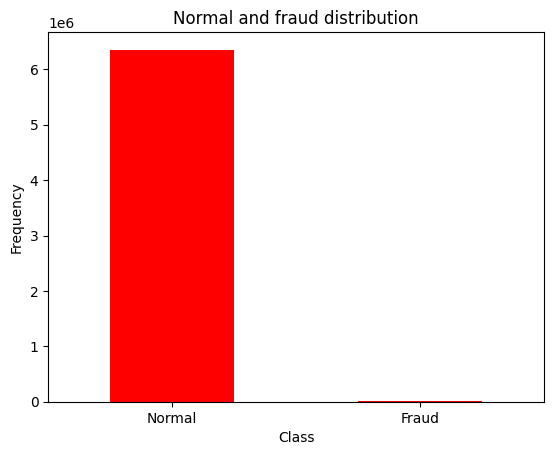

In [ ]:
fraud_check = pd.value_counts(df['isFraud'], sort =True)
fraud_check.plot(kind = 'bar', rot=0, color='r')
plt.title("Normal and fraud distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
Labels = ['Normal','Fraud']
plt.xticks(range(2), Labels)
plt.show()

In [ ]:
type_counts = df['type'].value_counts()

# Create a bar plot using Plotly Express
fig = px.bar(x=type_counts.index, y=type_counts.values, labels={'x': 'Transaction Type', 'y': 'Count'}, title='Transaction Type Distribution')

# Show the plot
fig.show()

In [ ]:
fraud_people = df[df['isFraud']==1]
normal_people = df[df['isFraud']==0]

In [ ]:
fraud_people.shape

(8213, 11)

In [ ]:
normal_people.shape


(6354407, 11)

In [ ]:
fraud_people['amount'].describe()


count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
normal_people['amount'].describe()


count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

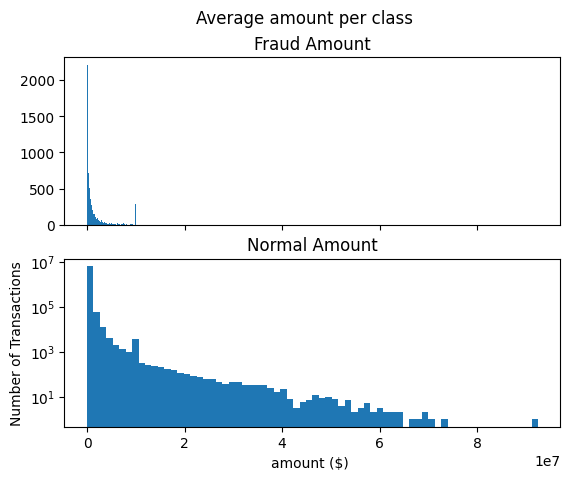

In [ ]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex = True)
graph.suptitle("Average amount per class")
bins = 70

plot1.hist(fraud_people['amount'], bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['amount'], bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('amount ($) ')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

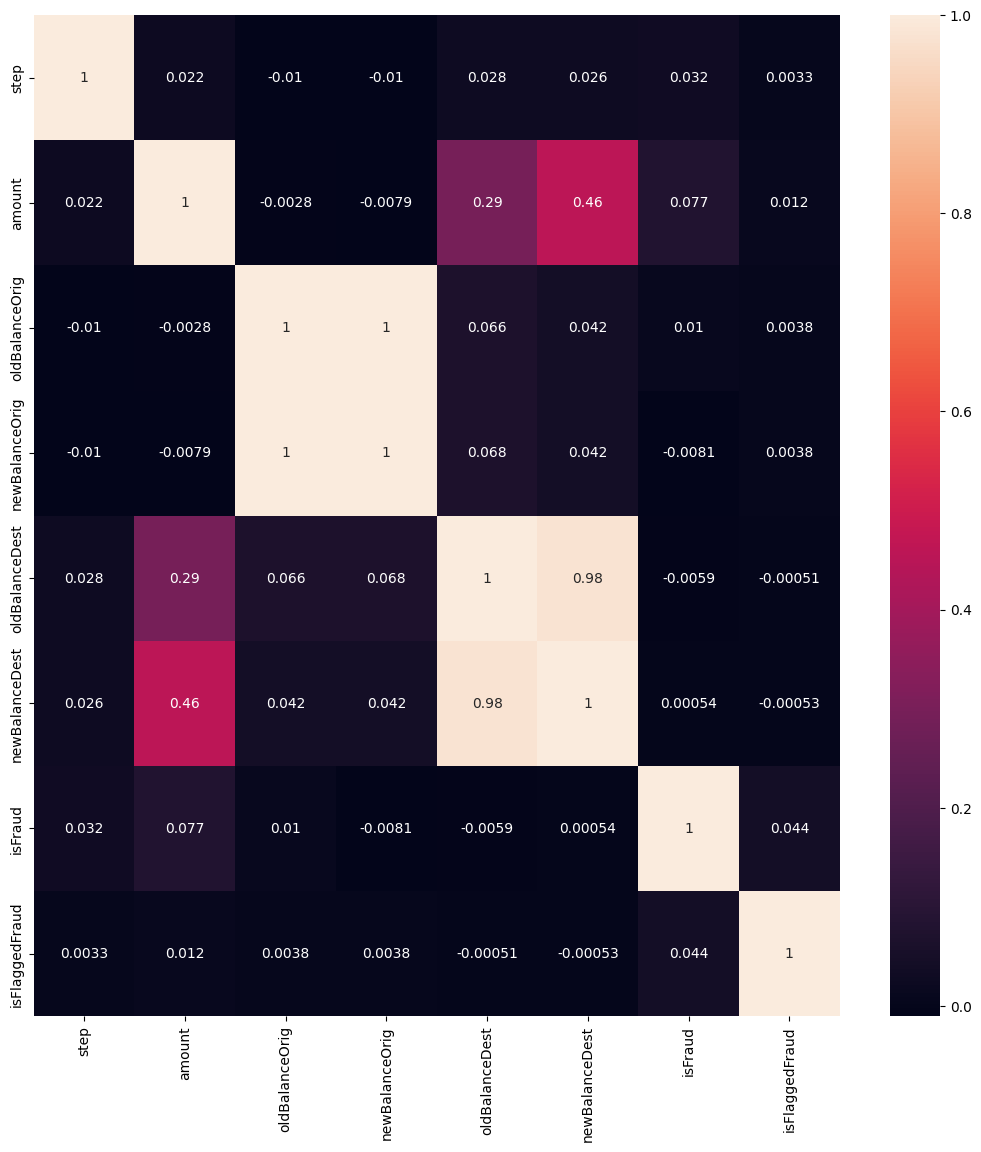

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

plt.figure(figsize=(13, 13))
sns.heatmap(corr, annot=True)
plt.show()


In [ ]:
columns = df.columns.tolist()

columns = [var for var in columns if var not in ["isFraud"]]

target = "isFraud"
x = df[columns]
y = df[target]

In [ ]:
x['type'].replace(['CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER'],['1','2','3','4','5',], inplace=True)

<ipython-input-30-9c04b7e9c924>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['type'].replace(['CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER'],['1','2','3','4','5',], inplace=True)


In [ ]:
x.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1, inplace=True)
x.head()

<ipython-input-31-a5d8455ba96f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1, inplace=True)


,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
0,1,4,9839.64,170136.0,160296.36,0.0,0.0
1,1,4,1864.28,21249.0,19384.72,0.0,0.0
2,1,5,181.00,181.0,0.00,0.0,0.0
3,1,2,181.00,181.0,0.00,21182.0,0.0
4,1,4,11668.14,41554.0,29885.86,0.0,0.0


In [ ]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state = 42)

In [ ]:
iso_forest = IsolationForest(n_estimators =100, max_samples = len(x_train), random_state=0, verbose=0)

In [ ]:
iso_forest.fit(x_train,y_train)

IsolationForest(max_samples=4453834, random_state=0)

In [ ]:

model_path = '/content/drive/MyDrive/iso_forest_fraud_model.pkl'
joblib.dump(iso_forest, model_path)
print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/iso_forest_fraud_model.pkl


In [ ]:
ypred = iso_forest.predict(x_test)

In [ ]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1

In [ ]:
print(accuracy_score(y_test,ypred))

0.9931794344677717


In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906351
           1       0.05      0.22      0.08      2435

    accuracy                           0.99   1908786
   macro avg       0.52      0.61      0.54   1908786
weighted avg       1.00      0.99      1.00   1908786



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, ypred)

array([[1895225,   11126],
       [   1893,     542]])

In [ ]:
n_erorrs = (ypred != y_test).sum()
print("Isolation Forest have {} erorrs.".format(n_erorrs))

Isolation Forest have 13019 erorrs.


In [ ]:
pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.5 MB/

In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load the trained Isolation Forest model
model = joblib.load('/content/drive/MyDrive/iso_forest_fraud_model.pkl')

# Define a function to make predictions
def predict_fraud(step, type, amount, nameOrig, oldBalanceOrig, newBalanceOrig, nameDest, oldBalanceDest, newBalanceDest, isFlaggedFraud):
    try:
        # Create a DataFrame for the input data
        input_data = pd.DataFrame({
            'step': [step],
            'type': [type],
            'amount': [amount],
            'nameOrig': [nameOrig],
            'oldBalanceOrig': [oldBalanceOrig],
            'newBalanceOrig': [newBalanceOrig],
            'nameDest': [nameDest],
            'oldBalanceDest': [oldBalanceDest],
            'newBalanceDest': [newBalanceDest],
            'isFlaggedFraud': [isFlaggedFraud]
        })

        # Drop the columns not used in the model
        input_data = input_data.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

        # Encode the 'type' column
        input_data['type'] = input_data['type'].replace({'CASH_IN': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'PAYMENT': 4, 'TRANSFER': 5})

        # Make prediction
        prediction = model.predict(input_data)

        # Convert the prediction to human-readable format
        if prediction[0] == -1:
            return "Fraud"
        else:
            return "Not Fraud"
    except Exception as e:
        print(f"Error: {e}")
        return f"Error: {e}"

# Define the Gradio interface
inputs = [
    gr.Number(label="Step"),
    gr.Dropdown(choices=['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'], label="Type"),
    gr.Number(label="Amount"),
    gr.Textbox(label="NameOrig"),
    gr.Number(label="OldBalanceOrig"),
    gr.Number(label="NewBalanceOrig"),
    gr.Textbox(label="NameDest"),
    gr.Number(label="OldBalanceDest"),
    gr.Number(label="NewBalanceDest"),
    gr.Number(label="IsFlaggedFraud")
]

outputs = gr.Textbox(label="Prediction")

gr.Interface(fn=predict_fraud, inputs=inputs, outputs=outputs, title="Fraud Detection System", description="Enter the transaction details to predict if it's fraud or not.").launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://997b3169658d8078ee.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
x=0
while(1==1):
  x+=0

KeyboardInterrupt: 